In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [85]:
data = pd.read_excel('HIV.xlsx', index=False)
data = data[['sample_id', 'data_1', 'Cutoff ', 'data_2', 'Cutoff .1']]
## set column names
data.columns = [['id', 'evo_data', 'evo_resp', 'rmp_data', 'rmp_resp']]

data.columns

MultiIndex(levels=[['evo_data', 'evo_resp', 'id', 'rmp_data', 'rmp_resp']],
           labels=[[2, 0, 1, 3, 4]])

In [86]:
data.duplicated().sum()

7

In [87]:
data.replace('', np.nan, inplace=True)
data.dropna(inplace=True)

In [88]:
data.drop_duplicates(subset=data['id'], keep='first')
data = data.drop(data.index[:8])
data.head()

,id,evo_data,evo_resp,rmp_data,rmp_resp
8,17V0161024,0.18,Negative,0.09,Negative
9,17V0161767,4.05,POSITIVE,3.90,POSITIVE
10,17V0161827,0.12,Negative,0.06,Negative
11,17V0161840,0.12,Negative,0.05,Negative
12,17V0161877,0.12,Negative,0.06,Negative


In [89]:
data.describe()

,evo_data,rmp_data
count,360.000000,360.000000
mean,0.319889,0.209694
std,0.723731,0.589605
min,-0.330000,-0.360000
25%,0.110000,0.050000
50%,0.130000,0.060000
75%,0.150000,0.060000
max,4.120000,3.900000


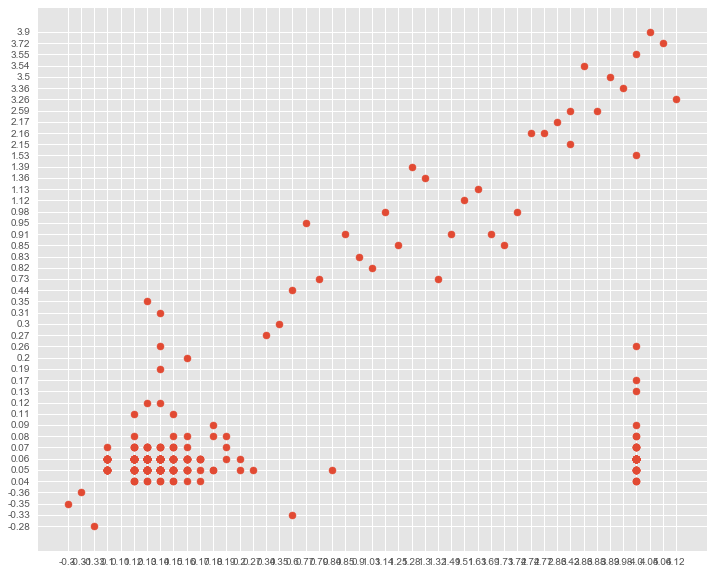

In [90]:
plt.scatter(data.evo_data, data.rmp_data)
plt.show()

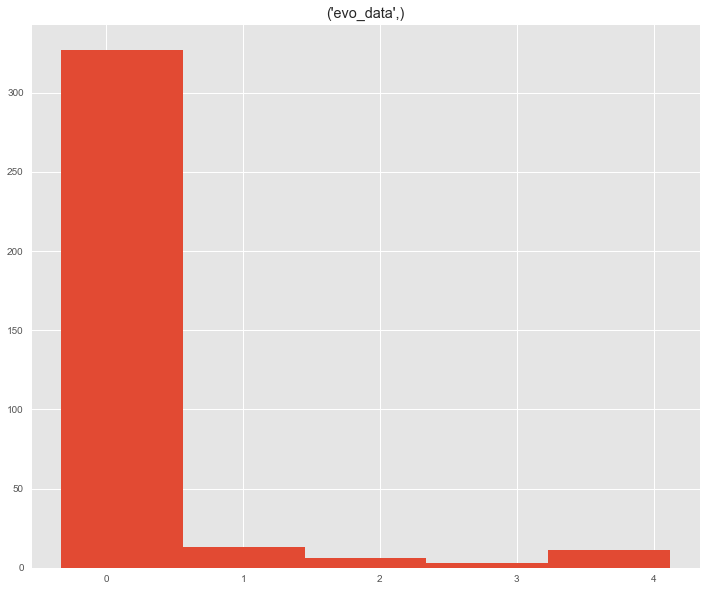

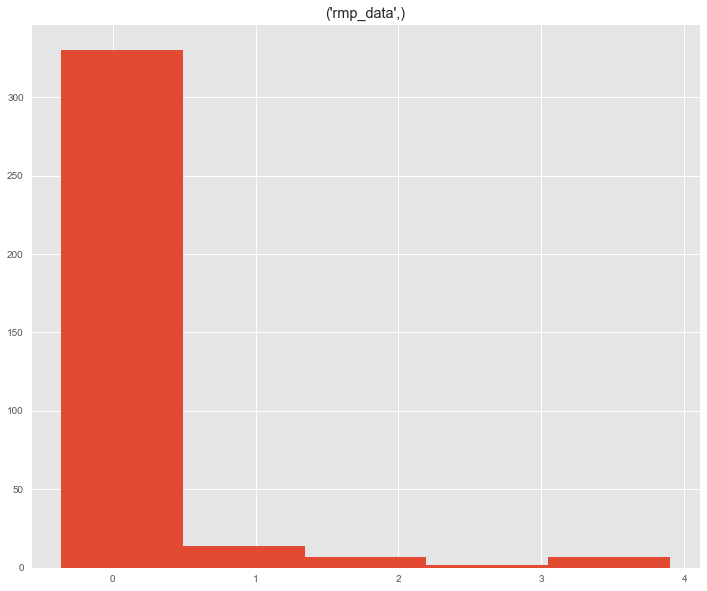

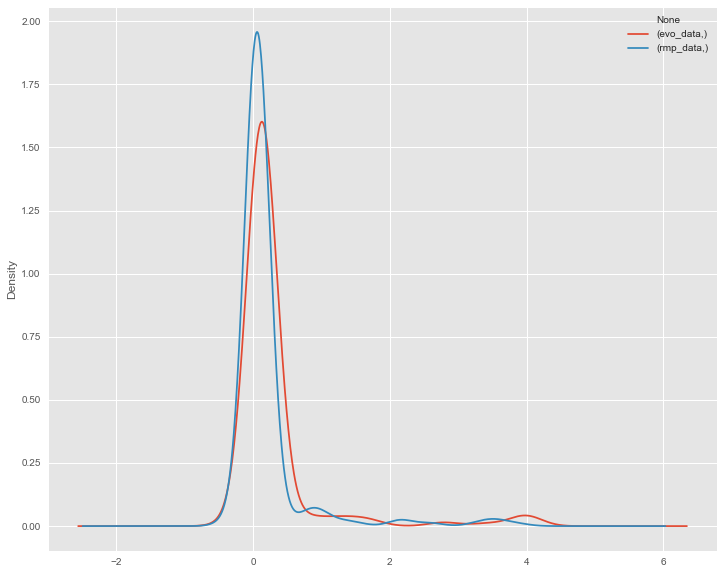

In [91]:
data['evo_data'].hist(bins=5)
plt.show()
data['rmp_data'].hist(bins=5)
data.plot.kde()
#plt.vlines(2.83, 0, 1, colors='k', linestyles='solid', label='')
plt.show()

In [92]:
import numpy as np
data.fillna(data.mean(), inplace=True)

x = np.array(data.evo_data)
y = np.array(data.rmp_data)


In [93]:
from scipy.stats import pearsonr
corr, _ = pearsonr(x,y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.971


In [94]:
# calculate the Cohen's d between two samples
from numpy.random import seed
from numpy import mean
from numpy import var
from math import sqrt

# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = mean(d1), mean(d2)
    # calculate the effect size
    return (u1 - u2) / s


d = cohend(x,y)
print('Cohens d: %.3f' % d)

Cohens d: 0.167


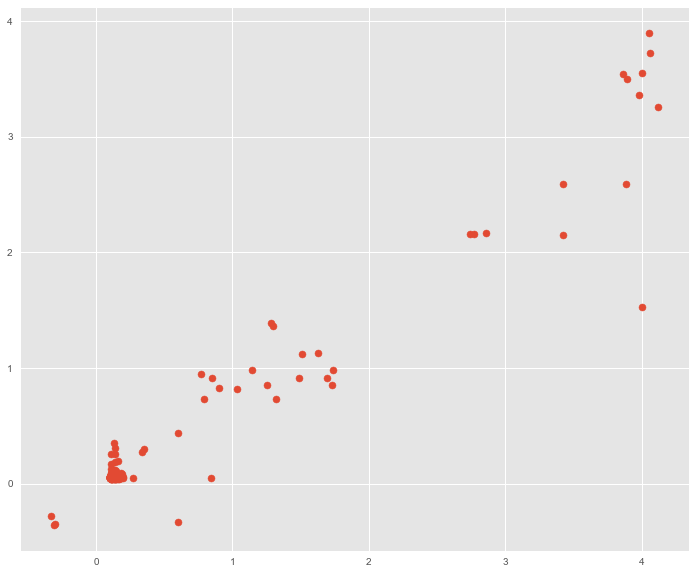

In [95]:
plt.scatter(x,y)
plt.show()

In [96]:
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

Cohen_d(x,y)

0.1671724192727562

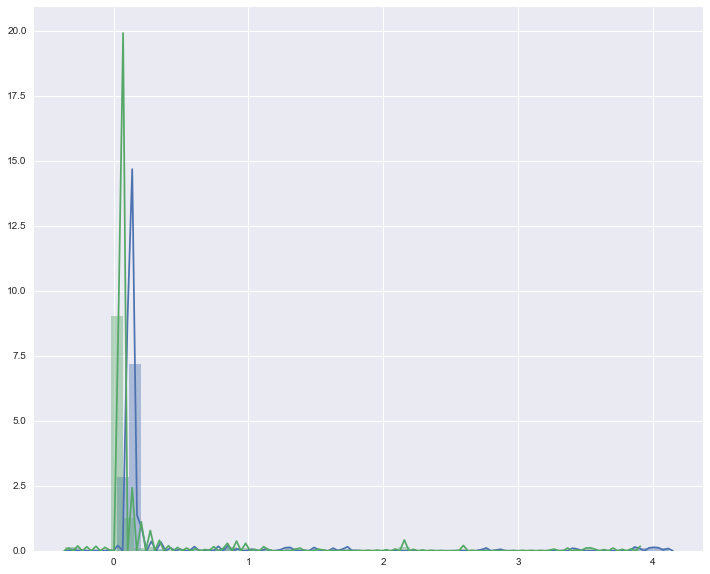

In [97]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(x) # Blue distribution
sns.distplot(y) # Green distribution

In [98]:
from scipy import stats
stats.ttest_ind(x,y)

Ttest_indResult(statistic=array([2.23973612]), pvalue=array([0.02541335]))

In [99]:
stats.ttest_rel(x,y)

Ttest_relResult(statistic=array([10.09601957]), pvalue=array([2.91514167e-21]))

In [102]:
x = pd.Series(data.evo_data)
y = pd.Series(data.rmp_data)


# gold_standard = pd.Series(x)
# test_vals = pd.Series(y)

In [104]:
from pandas_ml import ConfusionMatrix





cm = ConfusionMatrix(x,y)


cm

/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/abstract.py:66: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  df = df.loc[idx, idx.copy()].fillna(0)  # if some columns or rows are missing


Predicted    (evo_data,)  (rmp_data,)  __all__
Actual                                        
(evo_data,)            0          360      360
(rmp_data,)            0            0        0
__all__                0          360      360

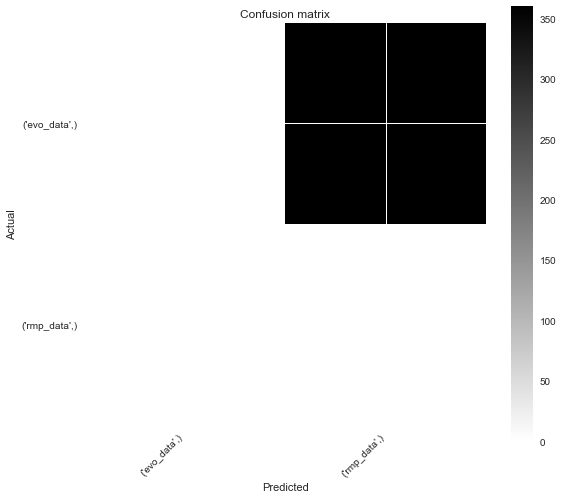

In [105]:
cm.plot()
plt.show()

In [106]:
cm.print_stats()

/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/stats.py:62: RuntimeWarning: invalid value encountered in double_scalars
  crand = num / den


AssertionError: Binary confusion matrix must have len=2 but len=1 because y_true.unique()=[False] y_pred.unique()=[False]

In [111]:
import statsmodels.api as sm
mod = sm.OLS(X,Y)
res = mod.fit()
res

In [113]:
print (res)